In [6]:
import molmap
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
#select your feature to generate a molmap

#flist = fext().bitsinfo.IDs.sample(12108).tolist()

# init your molmap, your can define your feature by using flist, default all of features are used
mp = molmap.MolMap(ftype = 'descriptor', flist = None, metric='cosine')

# fit your molmap using umap, tsne or mds method
#mp = mp.fit(method = 'umap', n_neighbors = 100, verbose = 2, random_state = 32) #n_neighbors value 50 for descriptor, 100 for fingerprint

In [83]:
#idx = shuffle(mp.flist)
#idx = mp.extract.bitsinfo.IDs.tolist()

from sklearn.utils import shuffle
import umap
s1 = mp.scale_info[mp.scale_info['var'] > 1e-4]
print(len(s1))
idx = s1.index.tolist()

idx = shuffle(idx)

1344


In [84]:
np.sqrt(len(idx))

36.66060555964672

In [85]:
D = mp.dist_matrix[idx].loc[idx]
D.shape

(1344, 1344)

In [96]:
um = umap.UMAP(min_dist = 0.1, n_neighbors = 50, verbose = 2, random_state = 32, metric='precomputed')
embedding = um.fit_transform(D)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='precomputed',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=50, negative_sample_rate=5, random_state=32,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Sat Oct 12 15:30:20 2019 Finding Nearest Neighbors
Sat Oct 12 15:30:20 2019 Finished Nearest Neighbor Search
Sat Oct 12 15:30:20 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Oct 12 15:30:24 2019 Fini

(-10.87952558902128,
 -1.0040689239181728,
 -4.786149046911811,
 5.014448187841988)

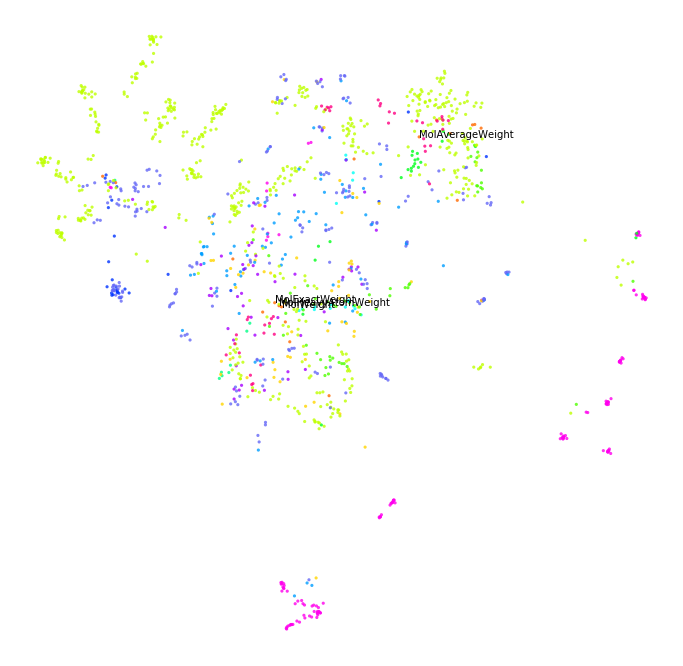

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=mp.extract.bitsinfo.set_index('IDs').loc[D.index].colors.tolist(), 
            edgecolor='none', 
            alpha=0.80, 
            s=10)


import pandas as pd
df = pd.DataFrame(embedding, index = idx, columns = ['x', 'y'])
bad = mp.dist_matrix.index[:4].tolist()
df1 = df.loc[bad]

for i in range(len(df1)):
    ts = df1.iloc[i]

    plt.text(ts.x,ts.y,ts.name)
    
plt.axis('off')